In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

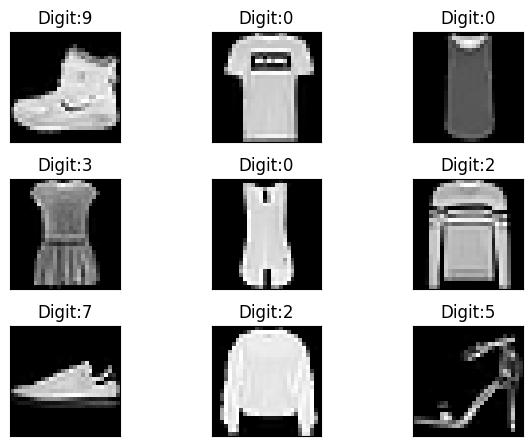

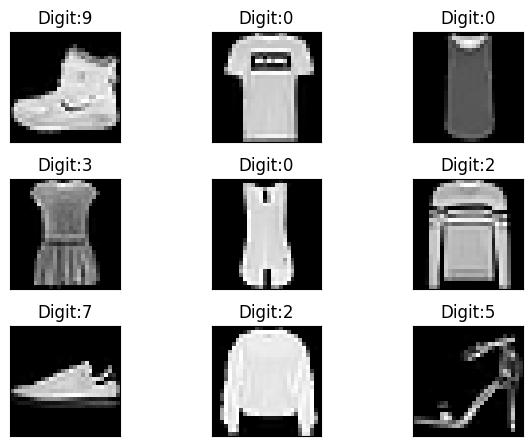

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title("Digit:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.7424 - loss: 0.7026 - val_accuracy: 0.8651 - val_loss: 0.3636
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8805 - loss: 0.3318 - val_accuracy: 0.8810 - val_loss: 0.3218
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.8962 - loss: 0.2801 - val_accuracy: 0.8940 - val_loss: 0.2937
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9083 - loss: 0.2471 - val_accuracy: 0.9030 - val_loss: 0.2757
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9164 - loss: 0.2233 - val_accuracy: 0.9048 - val_loss: 0.2718


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9045 - loss: 0.2730
test accuracy : 0.9047999978065491


In [ ]:
test_loss,test_acc = model.evaluate(train_images,train_labels)
print(f'train accuracy : {test_acc}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9281 - loss: 0.1914
train accuracy : 0.927483320236206


In [ ]:
import numpy as np

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([[3.32702967e-07, 8.39374508e-08, 1.93701894e-07, ...,
        3.37064127e-03, 1.43631000e-08, 9.96152580e-01],
       [3.04732221e-05, 2.94032873e-07, 9.97690320e-01, ...,
        8.48298931e-11, 1.92700304e-06, 2.63472577e-09],
       [4.31344196e-12, 9.99999940e-01, 4.27160946e-10, ...,
        4.52375598e-14, 8.68826625e-12, 4.89763835e-14],
       ...,
       [4.46776589e-08, 4.17308007e-13, 2.58874469e-08, ...,
        1.35980320e-08, 9.99999583e-01, 5.08880493e-10],
       [2.12855755e-09, 9.99999821e-01, 9.00769415e-09, ...,
        2.44393620e-11, 1.08732405e-10, 9.60931508e-12],
       [1.69797531e-05, 5.36273035e-07, 2.76789979e-05, ...,
        3.48698255e-03, 1.27978448e-04, 2.45958454e-05]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def predict_image(image_index):
  pred_label = np.argmax(predictions[image_index])
  true_label = test_labels[image_index]
  plt.figure()
  plt.imshow(test_images[image_index].reshape(28,28),cmap=plt.cm.binary)
  plt.title(f"Predicted: {pred_label} ,True Label: {true_label}")
  plt.axis("off")
  plt.show()

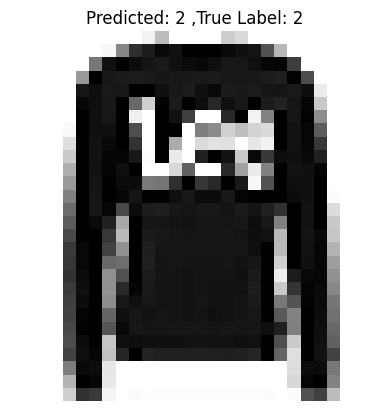

In [ ]:
predict_image(1)